## Train a deep MLP on the MNIST dataset 
(you can load it using `keras.datasets.mnist.load_data()`. See if you can get over 98% precision. 

Try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up). 

Try adding all the bells and whistles—save checkpoints, use early stopping, and plot learning curves using TensorBoard.

Let's load the dataset:

In [92]:
import tensorflow as tf
from tensorflow import keras
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

Just like for the Fashion MNIST dataset, the MNIST training set contains 60,000 grayscale images, each 28x28 pixels

The validation set contains 5,000 images, and the test set contains 10,000 images

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255, just like we did for Fashion MNIST:

In [93]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

1. Let's plot an image using Matplotlib's `imshow()` function, with a `'binary'` color map:

In [94]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

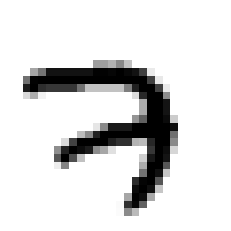

In [95]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [96]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

2. The labels are the class IDs (represented as uint8), from 0 to 9. Conveniently, the class IDs correspond to the digits represented in the images, so we don't need a `class_names` array:

In [97]:
X_valid.shape

(5000, 28, 28)

In [98]:
X_test.shape

(10000, 28, 28)

3. look at a sample of the images in the dataset:

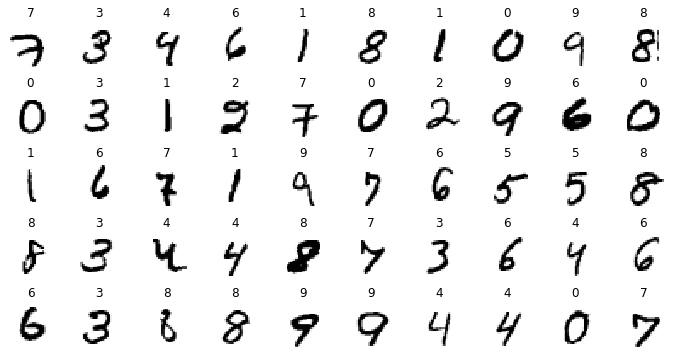

In [99]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

4. Build a simple dense network and find the optimal learning rate. We will need a callback to grow the learning rate at each iteration. It will also record the learning rate and the loss at each iteration:

In [100]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [101]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [102]:
from datetime import datetime
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="sigmoid"),
    keras.layers.Dense(10, activation="softmax")
])

We will start with a small learning rate of 1e-3, and grow it by 0.5% at each iteration:
Now let's train the model for just 1 epoch:
We can now plot the loss as a function of the learning rate:
Find a good learning rate.

In [103]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [104]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 13s 7ms/step - loss: 1.2939 - accuracy: 0.6075 - val_loss: 0.4539 - val_accuracy: 0.8750


Plotting Losses

Text(0, 0.5, 'Loss')

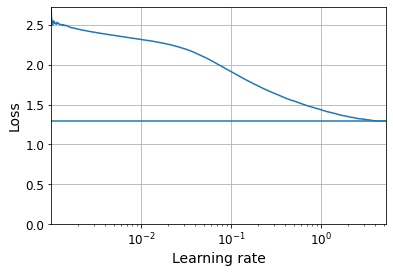

In [105]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

loss level shoots up at 0.6

In [106]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [107]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="sigmoid"),
    keras.layers.Dense(10, activation="softmax")
])

In [108]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])

In [109]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)

In [110]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3060 - accuracy: 0.9065 - val_loss: 0.1335 - val_accuracy: 0.9602
Epoch 2/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1170 - accuracy: 0.9649 - val_loss: 0.0954 - val_accuracy: 0.9722
Epoch 3/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0794 - accuracy: 0.9759 - val_loss: 0.0701 - val_accuracy: 0.9800
Epoch 4/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0567 - accuracy: 0.9822 - val_loss: 0.0815 - val_accuracy: 0.9734
Epoch 5/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0432 - accuracy: 0.9866 - val_loss: 0.0744 - val_accuracy: 0.9788
Epoch 6/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0319 - accuracy: 0.9901 - val_loss: 0.0616 - val_accuracy: 0.9840
Epoch 7/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0244 - accuracy: 0.9928 - val_loss: 0.0626 - val_accurac

In [111]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [112]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

1711/1719 [============================>.] - ETA: 0s - loss: 7.3280e-04 - accuracy: 1.0000
val/train: 88.31
1719/1719 [==============================] - 9s 5ms/step - loss: 7.3244e-04 - accuracy: 1.0000 - val_loss: 0.0647 - val_accuracy: 0.9848


In [113]:
model = keras.models.load_model("my_mnist_model.h5") 
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0641 - accuracy: 0.9809


[0.0641116052865982, 0.98089998960495]

As we can see we got a model that has precision over  98%

## Early Stoping

In [114]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, callbacks

In [115]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [116]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="sigmoid"),
    keras.layers.Dense(10, activation="softmax")
])

In [117]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=2e-1),
              metrics=["accuracy"])

In [118]:
import os
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\my_mnist_logs\\run_001'

In [119]:
early_stopping_cb = keras.callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
#tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3491 - accuracy: 0.8972 - val_loss: 0.1583 - val_accuracy: 0.9554
Epoch 2/100
1719/1719 [==============================] - 9s 6ms/step - loss: 0.1392 - accuracy: 0.9589 - val_loss: 0.1100 - val_accuracy: 0.9684
Epoch 3/100
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0947 - accuracy: 0.9717 - val_loss: 0.0791 - val_accuracy: 0.9782
Epoch 4/100
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0689 - accuracy: 0.9794 - val_loss: 0.0754 - val_accuracy: 0.9774
Epoch 5/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0536 - accuracy: 0.9841 - val_loss: 0.0817 - val_accuracy: 0.9750
Epoch 6/100
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0419 - accuracy: 0.9875 - val_loss: 0.0639 - val_accuracy: 0.9810
Epoch 7/100
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0330 - accuracy: 0.9902 - val_loss: 0.0697 - v

In [120]:
model = keras.models.load_model("my_mnist_model.h5")
model.evaluate(X_test, y_test)
model.evaluate(X_valid, y_valid)
model.evaluate(X_train, y_train)

1719/1719 [==============================] - 7s 4ms/step - loss: 0.0096 - accuracy: 0.9985


[0.009576806798577309, 0.9984909296035767]

In [121]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [122]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([7, 2, 1], dtype=int64)

## Tensor Board 

In [123]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [124]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2022_03_27-21_15_19'

In [125]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [126]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="sigmoid"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [127]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/10
1719/1719 [==============================] - 11s 6ms/step - loss: 27.3063 - val_loss: 27.3217
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 27.3058 - val_loss: 27.3213
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 27.3057 - val_loss: 27.3210
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 27.3052 - val_loss: 27.3208
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 27.3050 - val_loss: 27.3206
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 27.3049 - val_loss: 27.3204
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 27.3048 - val_loss: 27.3203
Epoch 8/10
1719/1719 [==============================] - 10s 6ms/step - loss: 27.3047 - val_loss: 27.3202
Epoch 9/10
1719/1719 [==============================] - 10s 6ms/step - loss: 27.3044 - val_loss: 27.3201
Epoch 10/10
1719/1719 [==============================] 

In [128]:
%load_ext tensorboard           
%tensorboard --logdir=.\my_logs --port=6006  

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 29408), started 3 days, 17:04:07 ago. (Use '!kill 29408' to kill it.)

### this doesn't work , I tried other values but I couldn't make it work moreover when I tried to use tensorboard_cb  i got an error "Out of Memory" and my browser got shut down, I read a lot of documentation on this but I can't make it work in Jupyter. 


In [129]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [130]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [131]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [132]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [133]:
weights, biases = hidden1.get_weights()

In [134]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [135]:
history = model.fit(X_train, y_train,
          batch_size=128, epochs=30,
          verbose=1,
          validation_data=(X_valid, y_valid))

Epoch 1/30
430/430 [==============================] - 5s 9ms/step - loss: 2.0902 - accuracy: 0.4928 - val_loss: 1.8105 - val_accuracy: 0.6806
Epoch 2/30
430/430 [==============================] - 4s 9ms/step - loss: 1.5230 - accuracy: 0.7347 - val_loss: 1.2353 - val_accuracy: 0.7762
Epoch 3/30
430/430 [==============================] - 4s 8ms/step - loss: 1.0563 - accuracy: 0.8022 - val_loss: 0.8849 - val_accuracy: 0.8252
Epoch 4/30
430/430 [==============================] - 4s 8ms/step - loss: 0.8008 - accuracy: 0.8334 - val_loss: 0.7005 - val_accuracy: 0.8512
Epoch 5/30
430/430 [==============================] - 4s 8ms/step - loss: 0.6606 - accuracy: 0.8513 - val_loss: 0.5918 - val_accuracy: 0.8650
Epoch 6/30
430/430 [==============================] - 4s 8ms/step - loss: 0.5739 - accuracy: 0.8648 - val_loss: 0.5209 - val_accuracy: 0.8764
Epoch 7/30
430/430 [==============================] - 4s 8ms/step - loss: 0.5151 - accuracy: 0.8740 - val_loss: 0.4708 - val_accuracy: 0.8846
Epoch 

(0.0, 1.0)

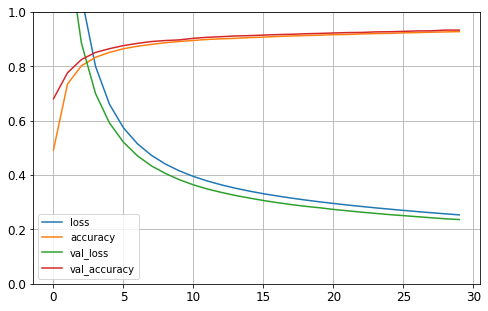

In [136]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

## Saving checkpoints

In [137]:
model.save_weights("my_keras_weights.ckpt")

In [138]:
model.load_weights("my_keras_weights.ckpt")

## Traing a DNN on MRI Slices data 

In [51]:

import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
#import numpy as np
import os

# to make this notebook's output stable across runs
#np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [52]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

file_dir = 'D:/Users/Sunil/MRI_Images-1 (1)/MRI_Images/'

In [53]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

file_dir = 'D:/Users/Sunil/MRI_Images-1 (1)/MRI_Images/'
#labels_dir=r'D:\Users\Sunil\MRI_Images-1 (1)\MRI_Images\labels-1.csv'
labels = pd.read_csv(file_dir + 'labels-1.csv')
y_new = labels.CDR

In [54]:
data_1 = np.zeros([609, 30976])

for n, file_name in enumerate(labels.Filename):
    data_1[n,:] = np.mean(matplotlib.image.imread(file_dir + file_name),axis=2).reshape(-1)

In [55]:
data_1.shape

(609, 30976)

In [56]:
image_norm = (data_1-data_1.mean())/data_1.std()

In [57]:
image_norm

array([[-1.20324559, -1.20324559, -1.20324559, ..., -1.20324559,
        -1.20324559, -1.20324559],
       [-1.06933913, -1.02470394, -1.20324559, ..., -1.20324559,
        -1.20324559, -1.20324559],
       [-1.20324559, -1.20324559, -1.20324559, ..., -1.20324559,
        -1.20324559, -1.20324559],
       ...,
       [-0.84616228, -0.69737757, -0.48907897, ..., -1.20324559,
        -1.20324559, -1.20324559],
       [-1.20324559, -1.20324559, -1.20324559, ..., -1.20324559,
        -1.20324559, -1.20324559],
       [-1.20324559, -1.20324559, -1.20324559, ..., -1.20324559,
        -1.20324559, -1.20324559]])

In [58]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(image_norm,y_new, test_size=0.2, random_state=0)


In [59]:
DS = 8           # Downsample rate, must be a multiple of 30976

N_train = y_train_full.shape[0]  # The length of the training data

if 30976/DS % 1 > 0:
    print("Downsample rate is not a multiple of 30976")
    DS = 1
    im_size = 30976
else:
    im_size = int(30976/DS)

Xds_train = np.zeros([N_train*DS, im_size])
yds_train = np.zeros(N_train*DS)
    
for n in range(N_train):
    for i in range(DS):
        Xds_train[n+i,:] = X_train_full[n,i::DS]
        yds_train[n+i] = y_new[n]
        
print(Xds_train.shape)
print(yds_train.shape)
print(N_train)


(3896, 3872)
(3896,)
487


In [60]:
X_train_full.shape

(487, 30976)

In [61]:
X_test.shape

(122, 30976)

In [62]:
 DS = 8            # Downsample rate, must be a multiple of 30976

N_test= y_test.shape[0]  # The length of the testing data data

if 30976/DS % 1 > 0:
    print("Downsample rate is not a multiple of 30976")
    DS = 1
    im_size = 30976
else:
    im_size = int(30976/DS)


In [63]:
Xds_test = np.zeros([N_test*DS, im_size])
yds_test = np.zeros(N_test*DS)
    

In [64]:
for n in range(N_test):
    for i in range(DS):
        Xds_test[n+i,:] = X_test[n,i::DS]
        yds_test[n+i] = y_new[n]
        
print(Xds_test.shape)
print(yds_test.shape)

(976, 3872)
(976,)


In [65]:
X_test = X_test / 255.0
X_valid, X_train = Xds_train[:500], Xds_train[500:]
y_valid, y_train = yds_train[:500], yds_train[500:]

In [72]:
import cv2
X_test1 = cv2.normalize(X_test, None, alpha=1,beta=0, norm_type=cv2.NORM_MINMAX)
X_valid1= cv2.normalize(X_valid, None, alpha=1,beta=0, norm_type=cv2.NORM_MINMAX)
X_train1= cv2.normalize(X_train, None, alpha=1,beta=0, norm_type=cv2.NORM_MINMAX)
y_valid1=cv2.normalize(y_valid, None, alpha=1,beta=0, norm_type=cv2.NORM_MINMAX)
y_train1=cv2.normalize(y_train, None, alpha=1,beta=0, norm_type=cv2.NORM_MINMAX)


In [73]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("data_1", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "data_1", "run_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [74]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[3872]))
for _ in range(5): #building neural network with 5 hidden layers
    model.add(keras.layers.Dense(100,
                                 activation="sigmoid",
                                 kernel_initializer="he_normal"))

In [75]:
optimizer = keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [76]:
history=model.fit(X_train1, y_train1, epochs=20,
          validation_data=(X_valid1, y_valid1),
          callbacks=callbacks)

Epoch 1/20
107/107 [==============================] - 7s 39ms/step - loss: 4.3738 - accuracy: 0.0000e+00 - val_loss: 3.6565 - val_accuracy: 0.0000e+00
Epoch 2/20
107/107 [==============================] - 4s 34ms/step - loss: 2.9564 - accuracy: 0.7644 - val_loss: 2.2966 - val_accuracy: 0.5980
Epoch 3/20
107/107 [==============================] - 4s 35ms/step - loss: 1.7035 - accuracy: 1.0000 - val_loss: 1.2392 - val_accuracy: 0.5980
Epoch 4/20
107/107 [==============================] - 4s 35ms/step - loss: 0.8718 - accuracy: 1.0000 - val_loss: 0.6639 - val_accuracy: 0.5980
Epoch 5/20
107/107 [==============================] - 4s 36ms/step - loss: 0.4646 - accuracy: 1.0000 - val_loss: 0.4086 - val_accuracy: 0.5980
Epoch 6/20
107/107 [==============================] - 4s 34ms/step - loss: 0.2803 - accuracy: 1.0000 - val_loss: 0.2901 - val_accuracy: 0.5980
Epoch 7/20
107/107 [==============================] - 4s 34ms/step - loss: 0.1883 - accuracy: 1.0000 - val_loss: 0.2280 - val_accuracy

In [77]:
model.evaluate(X_valid1, y_valid1)

16/16 [==============================] - 0s 4ms/step - loss: 0.1161 - accuracy: 0.5980


[0.1161361113190651, 0.5979999899864197]

In [78]:
#Scaling X_valid
from sklearn.preprocessing import StandardScaler
from pickle import dump
scaler = StandardScaler()
X = scaler.fit_transform(X_valid)
dump(scaler, open('scaler.pkl', 'wb'))

In [79]:
from pickle import load
scaler = load(open('scaler.pkl', 'rb'))

In [80]:
scaler.transform(X)

array([[ 5.78027699,  5.64722459,  5.11823088, ...,  7.83625843,
         7.72138846,  7.48044608],
       [ 5.78027699,  5.64722459,  5.11823088, ...,  7.83625843,
         7.72138846,  7.48044608],
       [20.84145399, 13.83105558, 20.06509889, ...,  7.83625843,
         7.72138846,  7.48044608],
       ...,
       [49.28103765, 49.76989642, 44.1110548 , ..., 74.00910913,
        72.56914632, 69.51576471],
       [49.28103765, 49.76989642, 44.1110548 , ..., 74.00910913,
        72.56914632, 69.51576471],
       [49.28103765, 49.76989642, 44.1110548 , ..., 74.00910913,
        72.56914632, 69.51576471]])

In [81]:
X

array([[-0.20740969, -0.23231237, -0.2587068 , ..., -0.12914492,
        -0.13330666, -0.14170805],
       [-0.20740969, -0.23231237, -0.2587068 , ..., -0.12914492,
        -0.13330666, -0.14170805],
       [ 2.29747436,  1.11914668,  2.36693208, ..., -0.12914492,
        -0.13330666, -0.14170805],
       ...,
       [ 7.02737425,  7.05400429,  6.5909606 , ...,  8.79398184,
         8.70002674,  8.49795188],
       [ 7.02737425,  7.05400429,  6.5909606 , ...,  8.79398184,
         8.70002674,  8.49795188],
       [ 7.02737425,  7.05400429,  6.5909606 , ...,  8.79398184,
         8.70002674,  8.49795188]])

In [82]:
#probability predicted
pred = model.predict(X) #prediction on scaled values of X_valid
print(pred)

[[0.9981943  0.14317822 0.09090561 ... 0.12814736 0.05662978 0.13229582]
 [0.9981931  0.14353904 0.09078217 ... 0.1280025  0.05675927 0.13320091]
 [0.99818844 0.14392546 0.09113261 ... 0.1285356  0.05673924 0.13280642]
 ...
 [0.99819136 0.14358276 0.09122947 ... 0.12893355 0.05681318 0.13224182]
 [0.99819136 0.14358276 0.09122947 ... 0.12893355 0.05681318 0.13224182]
 [0.99819136 0.14358276 0.09122947 ... 0.12893355 0.05681318 0.13224182]]


In [83]:
X_new = X_valid[:3]
y_pred = model.predict(X_new)

In [84]:
y_pred #prediction on X_valid 

array([[0.9981813 , 0.14315066, 0.09061453, 0.1010195 , 0.02712598,
        0.10908452, 0.13885298, 0.09170341, 0.04857329, 0.04120377,
        0.04391456, 0.10009542, 0.18268663, 0.09953356, 0.18722913,
        0.12364846, 0.07337362, 0.07416239, 0.09509411, 0.09560838,
        0.08243805, 0.03217182, 0.0793674 , 0.021584  , 0.02165216,
        0.04577506, 0.04946285, 0.04688296, 0.1318312 , 0.09090877,
        0.04260987, 0.07850128, 0.18529823, 0.17595804, 0.14168543,
        0.05462122, 0.20932615, 0.08008561, 0.0641568 , 0.0519709 ,
        0.10092199, 0.06251183, 0.08487952, 0.0922595 , 0.18824819,
        0.01402861, 0.05734694, 0.04600418, 0.02992696, 0.08075067,
        0.21543127, 0.03471321, 0.01573002, 0.22708863, 0.14547887,
        0.04983276, 0.02891126, 0.12220433, 0.06493378, 0.08679664,
        0.15379477, 0.07252929, 0.10450944, 0.05102345, 0.25480294,
        0.0575361 , 0.12057224, 0.05794412, 0.14291066, 0.02704746,
        0.05168155, 0.04924205, 0.06886733, 0.28

In [85]:
X_new1 = Xds_test[:3]
y_pred1 = model.predict(X_new1)

In [86]:
y_pred1 #prediction on test data 

array([[0.9981929 , 0.14324924, 0.090565  , 0.10096696, 0.02705902,
        0.10877749, 0.13921687, 0.09187907, 0.04841402, 0.04124701,
        0.04382649, 0.10023913, 0.18227926, 0.09944427, 0.18693802,
        0.1236394 , 0.07327741, 0.07393065, 0.09516451, 0.09565777,
        0.0825749 , 0.03212509, 0.07918277, 0.02163488, 0.02156556,
        0.04583737, 0.04945281, 0.04698721, 0.13137177, 0.0909692 ,
        0.04254329, 0.07875553, 0.18526506, 0.17547423, 0.14138263,
        0.0545167 , 0.20882234, 0.07982326, 0.0640856 , 0.05194968,
        0.10095397, 0.06239089, 0.08492792, 0.09212294, 0.1880554 ,
        0.01401764, 0.05713135, 0.04596281, 0.02988467, 0.08063424,
        0.21586117, 0.03482705, 0.01570636, 0.22666222, 0.14528883,
        0.04973015, 0.02887079, 0.12239966, 0.06474042, 0.08658287,
        0.15375206, 0.07236612, 0.10428968, 0.05106208, 0.25524694,
        0.05753383, 0.12047958, 0.05787736, 0.14265022, 0.02709755,
        0.05155328, 0.04924068, 0.06899753, 0.28

In [87]:
model.save("my_keras_model.h5")

In [88]:
model1 = keras.models.load_model("my_keras_model.h5")

In [89]:
model1.predict(X_new)

array([[0.9981813 , 0.14315066, 0.09061453, 0.1010195 , 0.02712598,
        0.10908452, 0.13885298, 0.09170341, 0.04857329, 0.04120377,
        0.04391456, 0.10009542, 0.18268663, 0.09953356, 0.18722913,
        0.12364846, 0.07337362, 0.07416239, 0.09509411, 0.09560838,
        0.08243805, 0.03217182, 0.0793674 , 0.021584  , 0.02165216,
        0.04577506, 0.04946285, 0.04688296, 0.1318312 , 0.09090877,
        0.04260987, 0.07850128, 0.18529823, 0.17595804, 0.14168543,
        0.05462122, 0.20932615, 0.08008561, 0.0641568 , 0.0519709 ,
        0.10092199, 0.06251183, 0.08487952, 0.0922595 , 0.18824819,
        0.01402861, 0.05734694, 0.04600418, 0.02992696, 0.08075067,
        0.21543127, 0.03471321, 0.01573002, 0.22708863, 0.14547887,
        0.04983276, 0.02891126, 0.12220433, 0.06493378, 0.08679664,
        0.15379477, 0.07252929, 0.10450944, 0.05102345, 0.25480294,
        0.0575361 , 0.12057224, 0.05794412, 0.14291066, 0.02704746,
        0.05168155, 0.04924205, 0.06886733, 0.28

In [90]:
model.save_weights("my_keras_weights.ckpt")

In [91]:
model.load_weights("my_keras_weights.ckpt")